# **Test with other images**

In [21]:
import pytesseract
from pytesseract import Output
import cv2 
import matplotlib.pyplot as plt
import seaborn as sns
import re

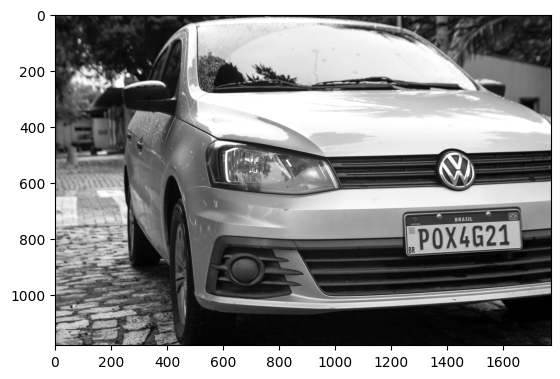

In [22]:
img = cv2.imread('itens/images/placa_carro2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

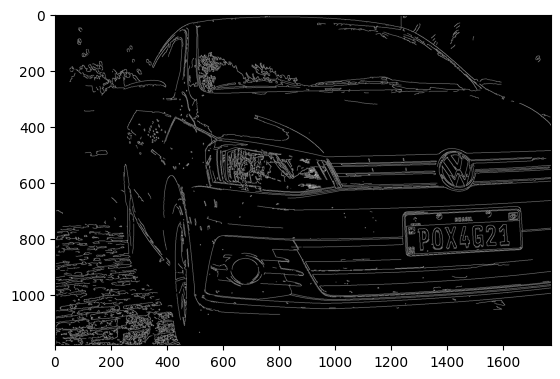

In [23]:
outlines = cv2.Canny(img, 100, 200)
plt.imshow(outlines, cmap='gray')

In [24]:
outlines, hierarchy = cv2.findContours(outlines, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
outlines = sorted(outlines, key=cv2.contourArea, reverse=True)[:10]

In [25]:
for outline in outlines:
    # Criando a margem de erro 
    epsilon = 0.02*cv2.arcLength(outline, True)
    # Aproximando o contorno
    approx = cv2.approxPolyDP(outline, epsilon, True)
    # Verificando se o contorno é convexo e se possui 4 lados
    if cv2.isContourConvex(approx) and len(approx) == 4:
        locale = approx
        break


In [26]:
locale

array([[[1659,  737]],

       [[1656,  835]],

       [[1260,  850]],

       [[1259,  756]]], dtype=int32)

In [27]:
x, y, w, h = cv2.boundingRect(locale)

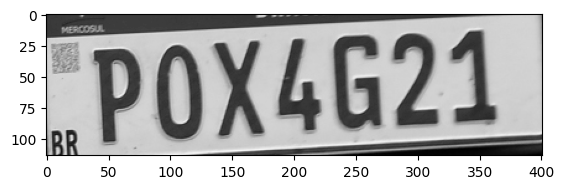

In [28]:
plate = img[y:y+h, x:x+w]
plt.imshow(plate, cmap='gray')

# Limearization + tesseract

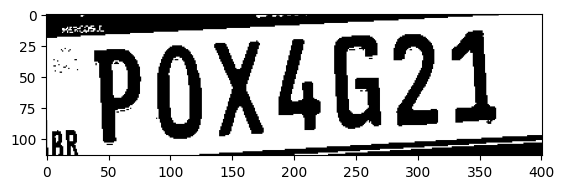

In [29]:
value, lim_otsu = cv2.threshold(plate, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.imshow(lim_otsu, cmap='gray')

In [30]:
config_tesseract = '--tessdata-dir "/usr/share/tesseract-ocr/4.00/tessdata" --psm 6'
txt = pytesseract.image_to_string(lim_otsu, config=config_tesseract, lang='por')
extracted_text = re.search('\w{3}\d{1}\w{1}\d{2}', txt)

print(extracted_text.group())

POX4G21


# **Topics**
-   Aplicar algoritmos para detectar bordas de objetos em imagens;
-   Explicar os passos do algoritmo de Canny;
-   Encontrar a região da placa de um veículo em uma imagem;
-   Utilizar o regex para validar textos e extrair a informação necessária.
